## Importing Required Libraries

In [25]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt

## Loading and Inspecting the MNIST Dataset with Keras

In [26]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()
print("X_train Shape: ",X_train.shape)
print("y_train Shape: ",y_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (60000, 28, 28)
y_train Shape:  (60000,)
X_test Shape:  (10000, 28, 28)
y_test Shape:  (10000,)


## Visualizing Sample Images from X_train with Corresponding Labels from y_train


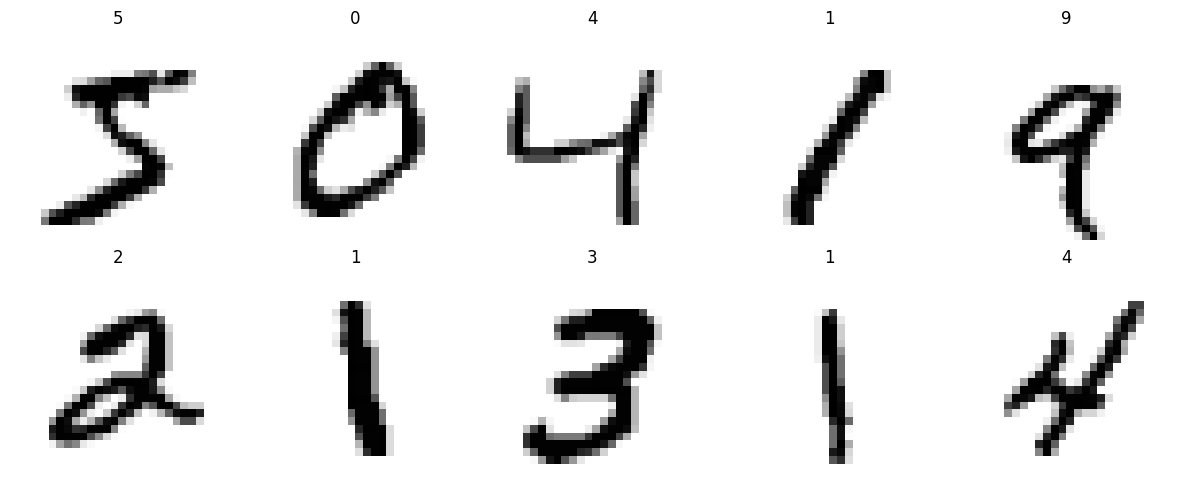

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))  

for i in range(10):  
    plt.subplot(2, 5, i + 1)   
    plt.imshow(X_train[i], cmap="binary")
    plt.title(y_train[i])
    plt.axis("off") 

plt.tight_layout()
plt.show()


In [11]:
X_train = X_train/255
X_test = X_test/255

### Simple Feedforward Neural Network for 28x28 Input Images


In [13]:
from tensorflow.keras.layers import Input
model = Sequential([
    Input(shape=(28, 28)),       
    Flatten(),                    
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

## Summary of the Fully Connected Neural Network Model


In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='adam',                       
    metrics=['accuracy']                    
)


### Training the Model on the Dataset for 25 Epochs with 20% Validation Split


In [16]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9185 - loss: 0.2791 - val_accuracy: 0.9613 - val_loss: 0.1383
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9653 - loss: 0.1156 - val_accuracy: 0.9703 - val_loss: 0.0998
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9760 - loss: 0.0806 - val_accuracy: 0.9741 - val_loss: 0.0894
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9813 - loss: 0.0588 - val_accuracy: 0.9707 - val_loss: 0.1016
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9857 - loss: 0.0452 - val_accuracy: 0.9692 - val_loss: 0.1106
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9886 - loss: 0.0361 - val_accuracy: 0.9743 - val_loss: 0.0948
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9906 - loss: 0.0295 - val_accuracy: 0.9722 - val_loss: 0.1120
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9918 - loss: 0.0249 - 

In [27]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step


In [18]:
y_pred = y_prob.argmax(axis=1)

### Model Accuracy on the Test Set


In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9771

### Confusion Matrix and Classification Report for Model Evaluation


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step


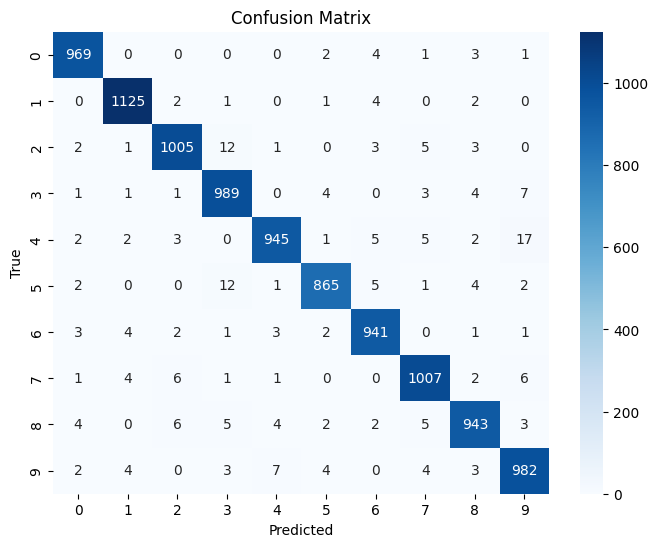

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.96      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))


### Training and Validation Accuracy & Loss Over Epochs


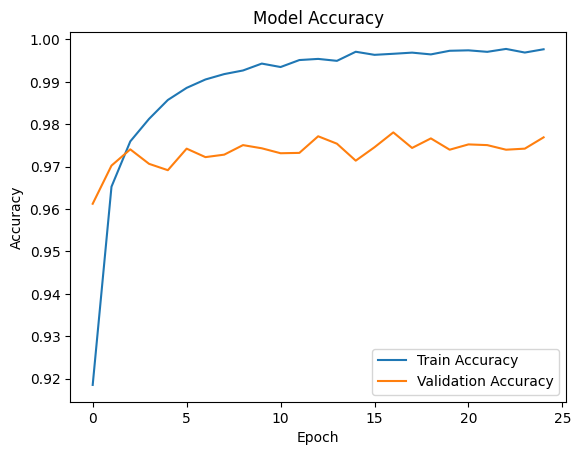

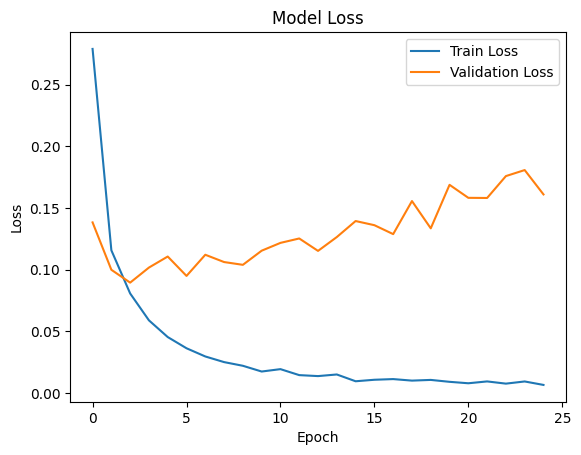

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Saving and Loading the Trained Model


In [23]:
model.save("my_model.keras")

from keras.models import load_model
model_s = load_model("my_model.keras")

### Interactive Handwritten Digit Recognition with Pygame


In [ ]:
import pygame, sys
from pygame.locals import *

import numpy as np
from keras.models import load_model
import cv2

WINDOWSIZEX = 640
WINDOWSIZEY = 640

BOUNDRYINC = 5
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
RED = (255, 0, 0)

IMAGESAVE = False

MODEL = load_model('my_model.keras')
LABELS = {0:'Zero', 1:'One',
          2:'Two', 3:'Three',
          4:'Four', 5:'Five',
          6:'Six', 7:'Seven',
          8:'Eight', 9:'Nine'}


pygame.init()

FONT = pygame.font.Font('freesansbold.ttf', 18)
DISPLAYSURF = pygame.display.set_mode((WINDOWSIZEX, WINDOWSIZEY))


pygame.display.set_caption('Hand Written Digit Prediction')

iswriting = False

number_xcord = []
number_ycord = []

image_cnt = 1
PREDICT = True

while True:

    for event in pygame.event.get():
        if event.type == QUIT:
            pygame.quit()
            sys.exit()

        if event.type == MOUSEMOTION and iswriting:
            x, y = event.pos
            pygame.draw.circle(DISPLAYSURF, WHITE, (x, y), 4, 0)

            number_xcord.append(x)
            number_ycord.append(y)

        if event.type == MOUSEBUTTONDOWN:
            iswriting = True

        if event.type == MOUSEBUTTONUP:
            iswriting = False
            number_xcord = sorted(number_xcord)
            number_ycord = sorted(number_ycord)

            rect_min_x, rect_max_x = max(number_xcord[0] - BOUNDRYINC, 0), min(WINDOWSIZEX, number_xcord[-1] + BOUNDRYINC)
            rect_min_y, rect_max_y = max(number_ycord[0] - BOUNDRYINC, 0), min(WINDOWSIZEY, number_ycord[-1] + BOUNDRYINC)


            number_xcord = []
            number_ycord = []

            img_array = np.array(pygame.PixelArray(DISPLAYSURF))[rect_min_x:rect_max_x, rect_min_y:rect_max_y].T.astype(np.float32)

            if IMAGESAVE:
                cv2.imwrite(f'image_{image_cnt}.png', img_array)
                image_cnt += 1
            if PREDICT:
                image = cv2.resize(img_array, (28, 28))
                image = np.pad(image, (10, 10), 'constant', constant_values=0)
                image = cv2.resize(image, (28, 28))/255

                label = str(LABELS[np.argmax(MODEL.predict(image.reshape(1, 28, 28, 1)))])

                textSurface = FONT.render(label, True, RED, WHITE)
                textRecObj = textSurface.get_rect()
                textRecObj.left, textRecObj.bottom = rect_min_x, rect_max_y

                DISPLAYSURF.blit(textSurface, textRecObj)

            if event.type == KEYDOWN:
                if event.unicode == 'n':
                    DISPLAYSURF.fill(BLACK)

    pygame.display.update()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
